In [1]:
# AI NOVATUS PBL (Problem-Based Learning) : BASE LINE CODE 

import time 
import datetime
from datetime import datetime

import numpy as np
import pandas as pd
# pd.set_option('display.max_row', None)
# pd.set_option('display.max_columns', None)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# from sklearn.linear_model import Ridge  # L2 regularization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, accuracy_score, roc_auc_score, mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# from sklearn.inspection import permutation_importance

# import lightgbm as lgb
# import xgboost as xgb
# from xgboost import plot_importance

# from catboost import CatBoostClassifier

from scipy import interpolate

import statsmodels.api as sm

# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import Dense

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv('/home/kym/ML/input/ai_nova/sensor.csv')
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
df.shape

(220320, 55)

In [4]:
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

if df.index.dtype == 'datetime64[ns]':
    df.set_index('timestamp', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      220320 non-null  int64         
 1   timestamp       220320 non-null  datetime64[ns]
 2   sensor_00       210112 non-null  float64       
 3   sensor_01       219951 non-null  float64       
 4   sensor_02       220301 non-null  float64       
 5   sensor_03       220301 non-null  float64       
 6   sensor_04       220301 non-null  float64       
 7   sensor_05       220301 non-null  float64       
 8   sensor_06       215522 non-null  float64       
 9   sensor_07       214869 non-null  float64       
 10  sensor_08       215213 non-null  float64       
 11  sensor_09       215725 non-null  float64       
 12  sensor_10       220301 non-null  float64       
 13  sensor_11       220301 non-null  float64       
 14  sensor_12       220301 non-null  flo

<AxesSubplot:>

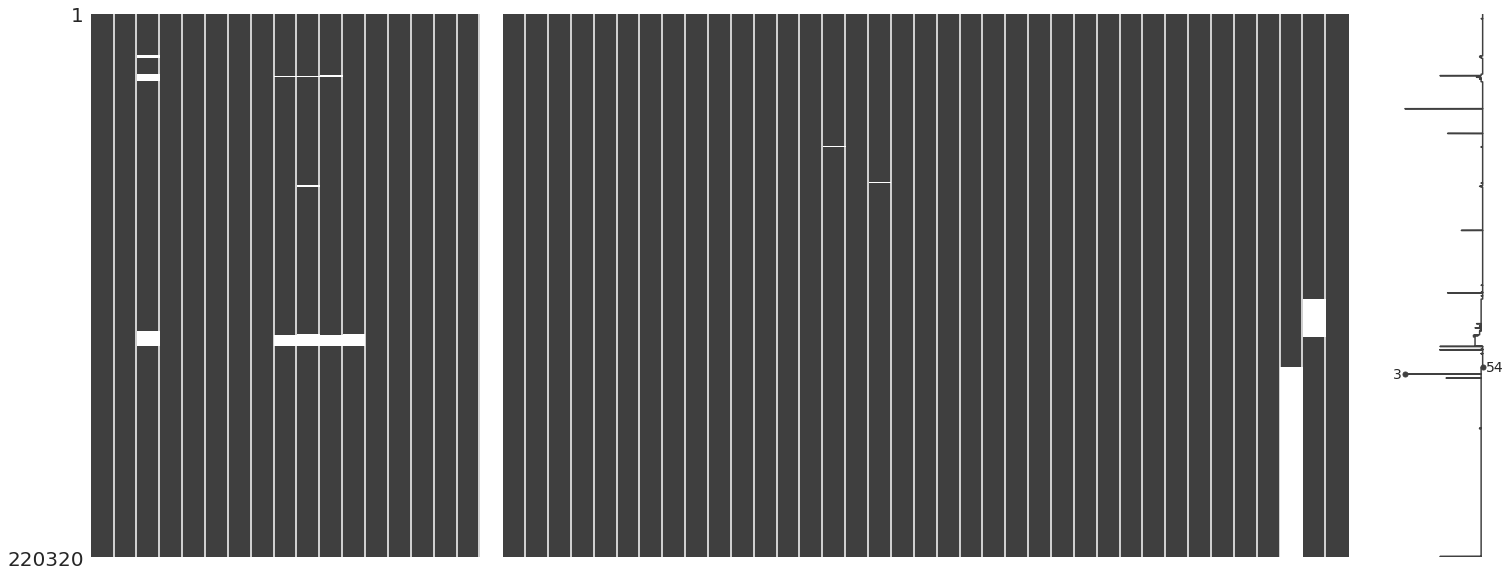

In [6]:
msno.matrix(df)

In [7]:
def cal_percent_nans(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False) / len(df),
                       columns=['percent'])
    idx = nans['percent'] > 0
    return nans[idx]

cal_percent_nans(df).head(10)

,percent
sensor_15,1.000000
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185


In [8]:
# remove too many NaN cols (> 30 %)
nan_df = df[['Unnamed: 0', 'sensor_15', 'sensor_50']]

# preprocessing : remove NaN data 
df.drop(['Unnamed: 0', 'sensor_15', 'sensor_50'], axis=1, inplace=True)
print(df.columns)

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51', 'machine_status'],
      dtype='object')


## EDA

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


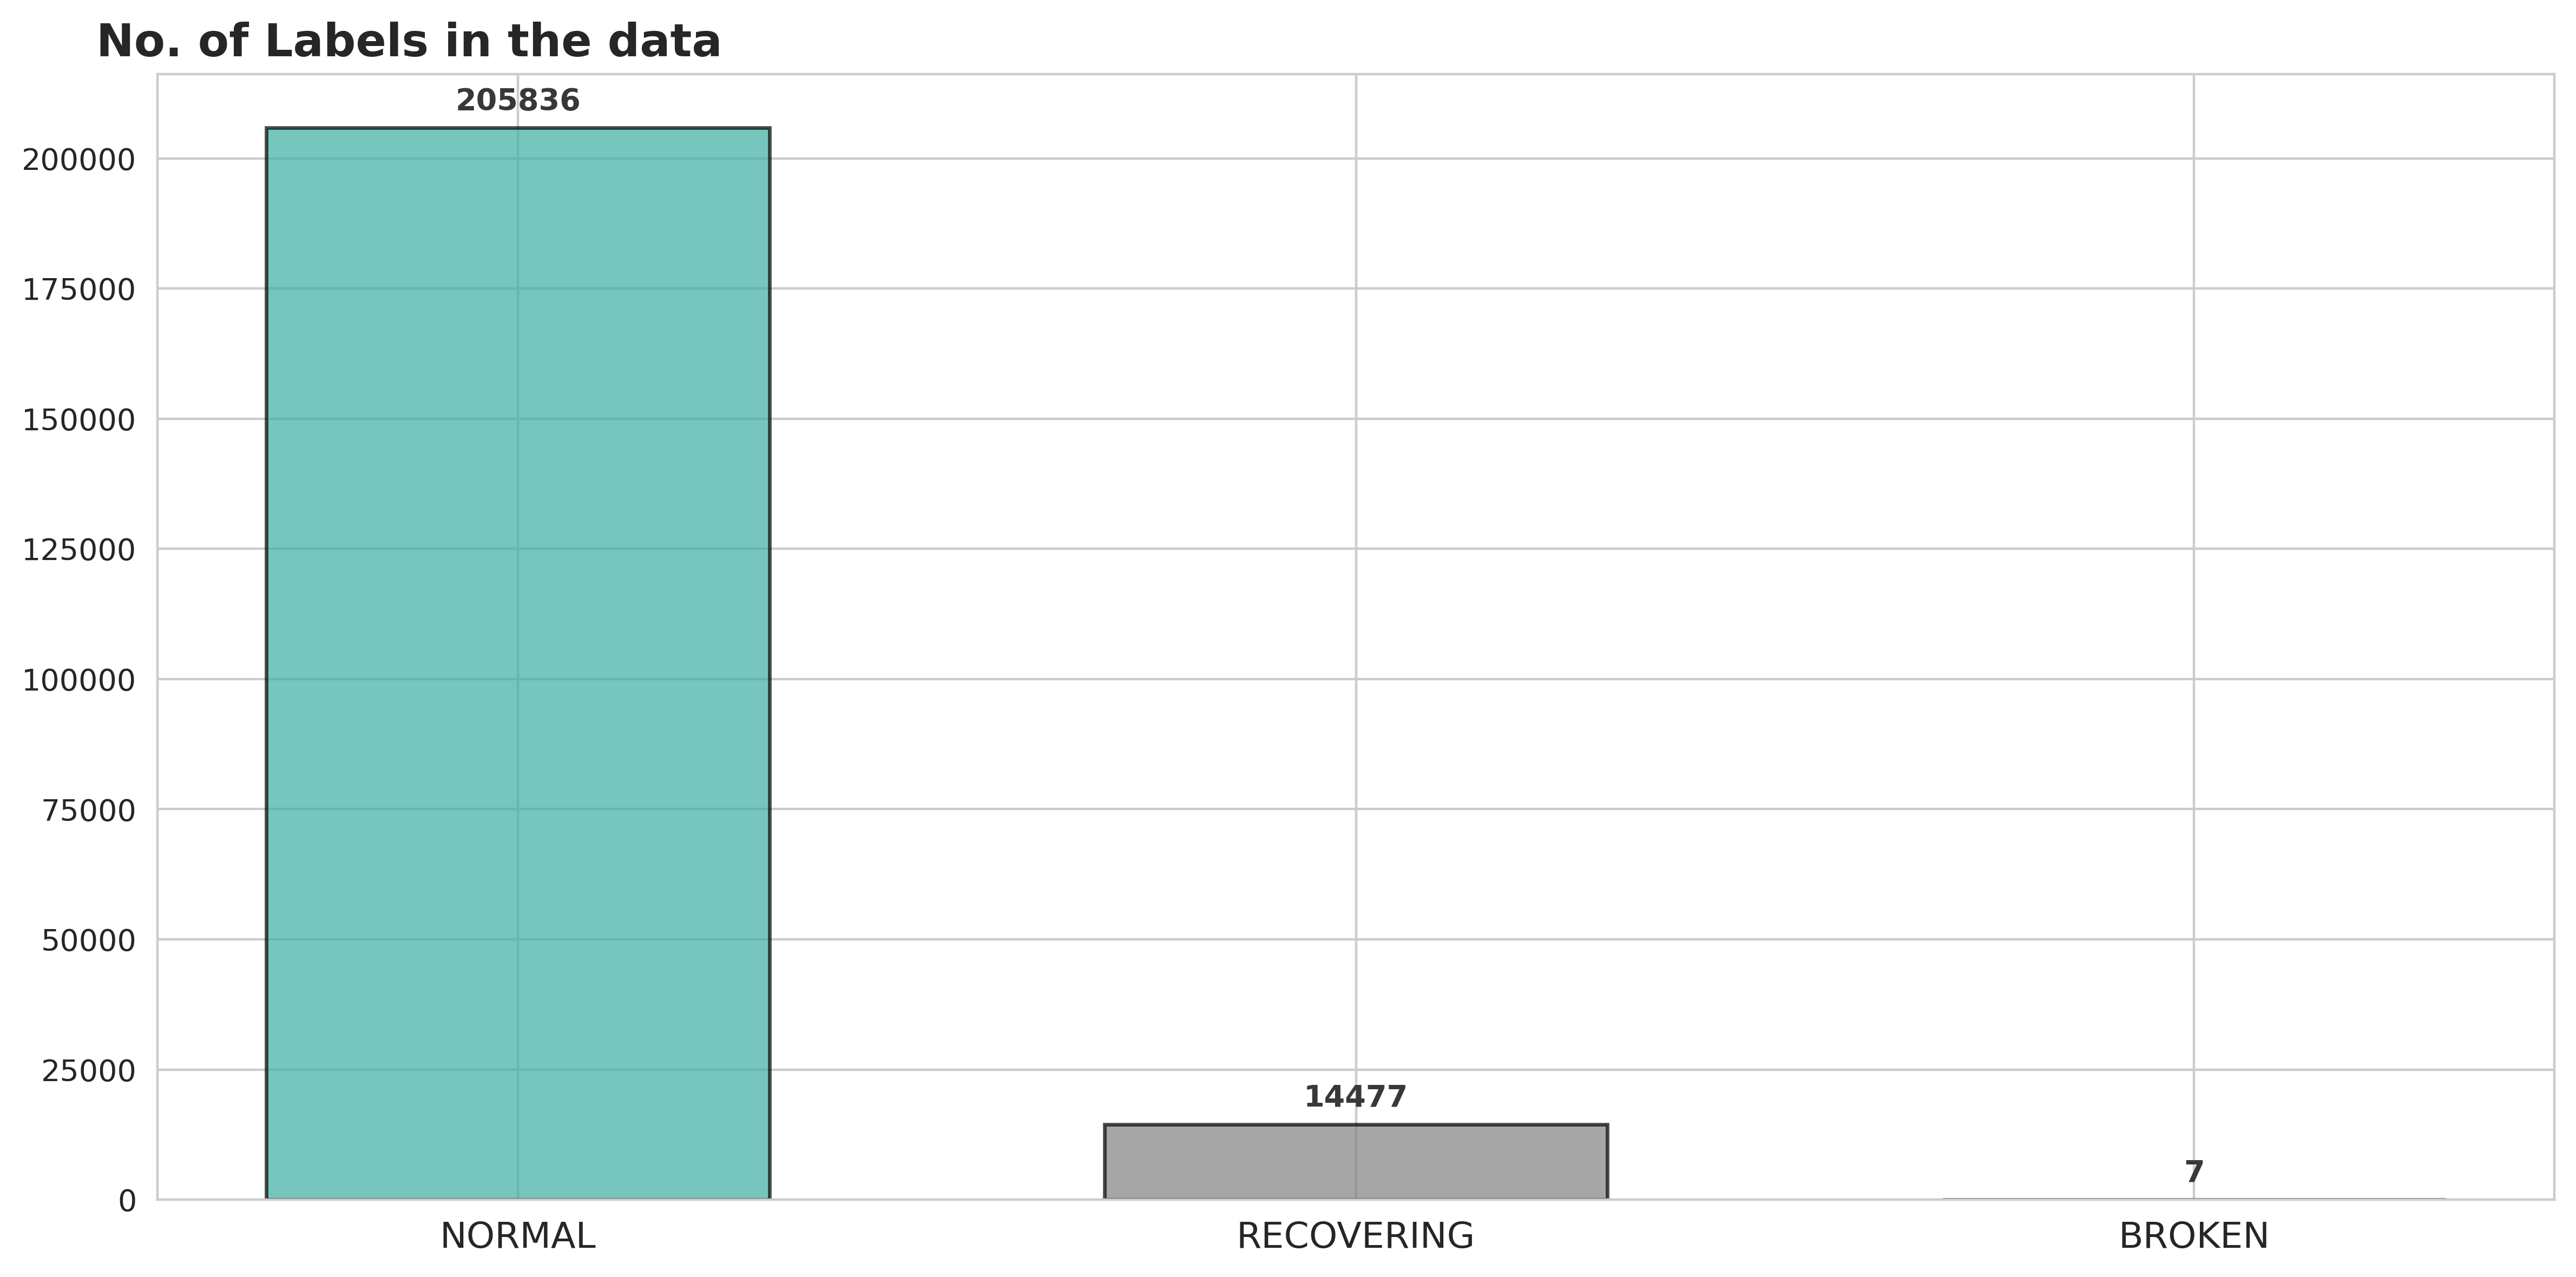

In [9]:
# label check (extremely imbalanced label, real world)
label = df['machine_status'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=400)
color_map = ['gray' for _ in range(len(df['machine_status'].value_counts()))]
color_map[0] = "#3caea3"

ax.bar(label.index, label, alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax.set_title('No. of Labels in the data', fontsize=15, fontweight='bold', fontfamily='NanumGothic', position=(0.105, 1.0))

for i in label.index:
    ax.annotate(f"{label[i]}",
                xy=(i, label[i] + 5000),
                va='center', ha='center', fontweight='bold', color='#383838')
    
ax.set_xticklabels(label.index, fontsize=12, fontfamily='NanumGothic', rotation=0)
plt.tight_layout()
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

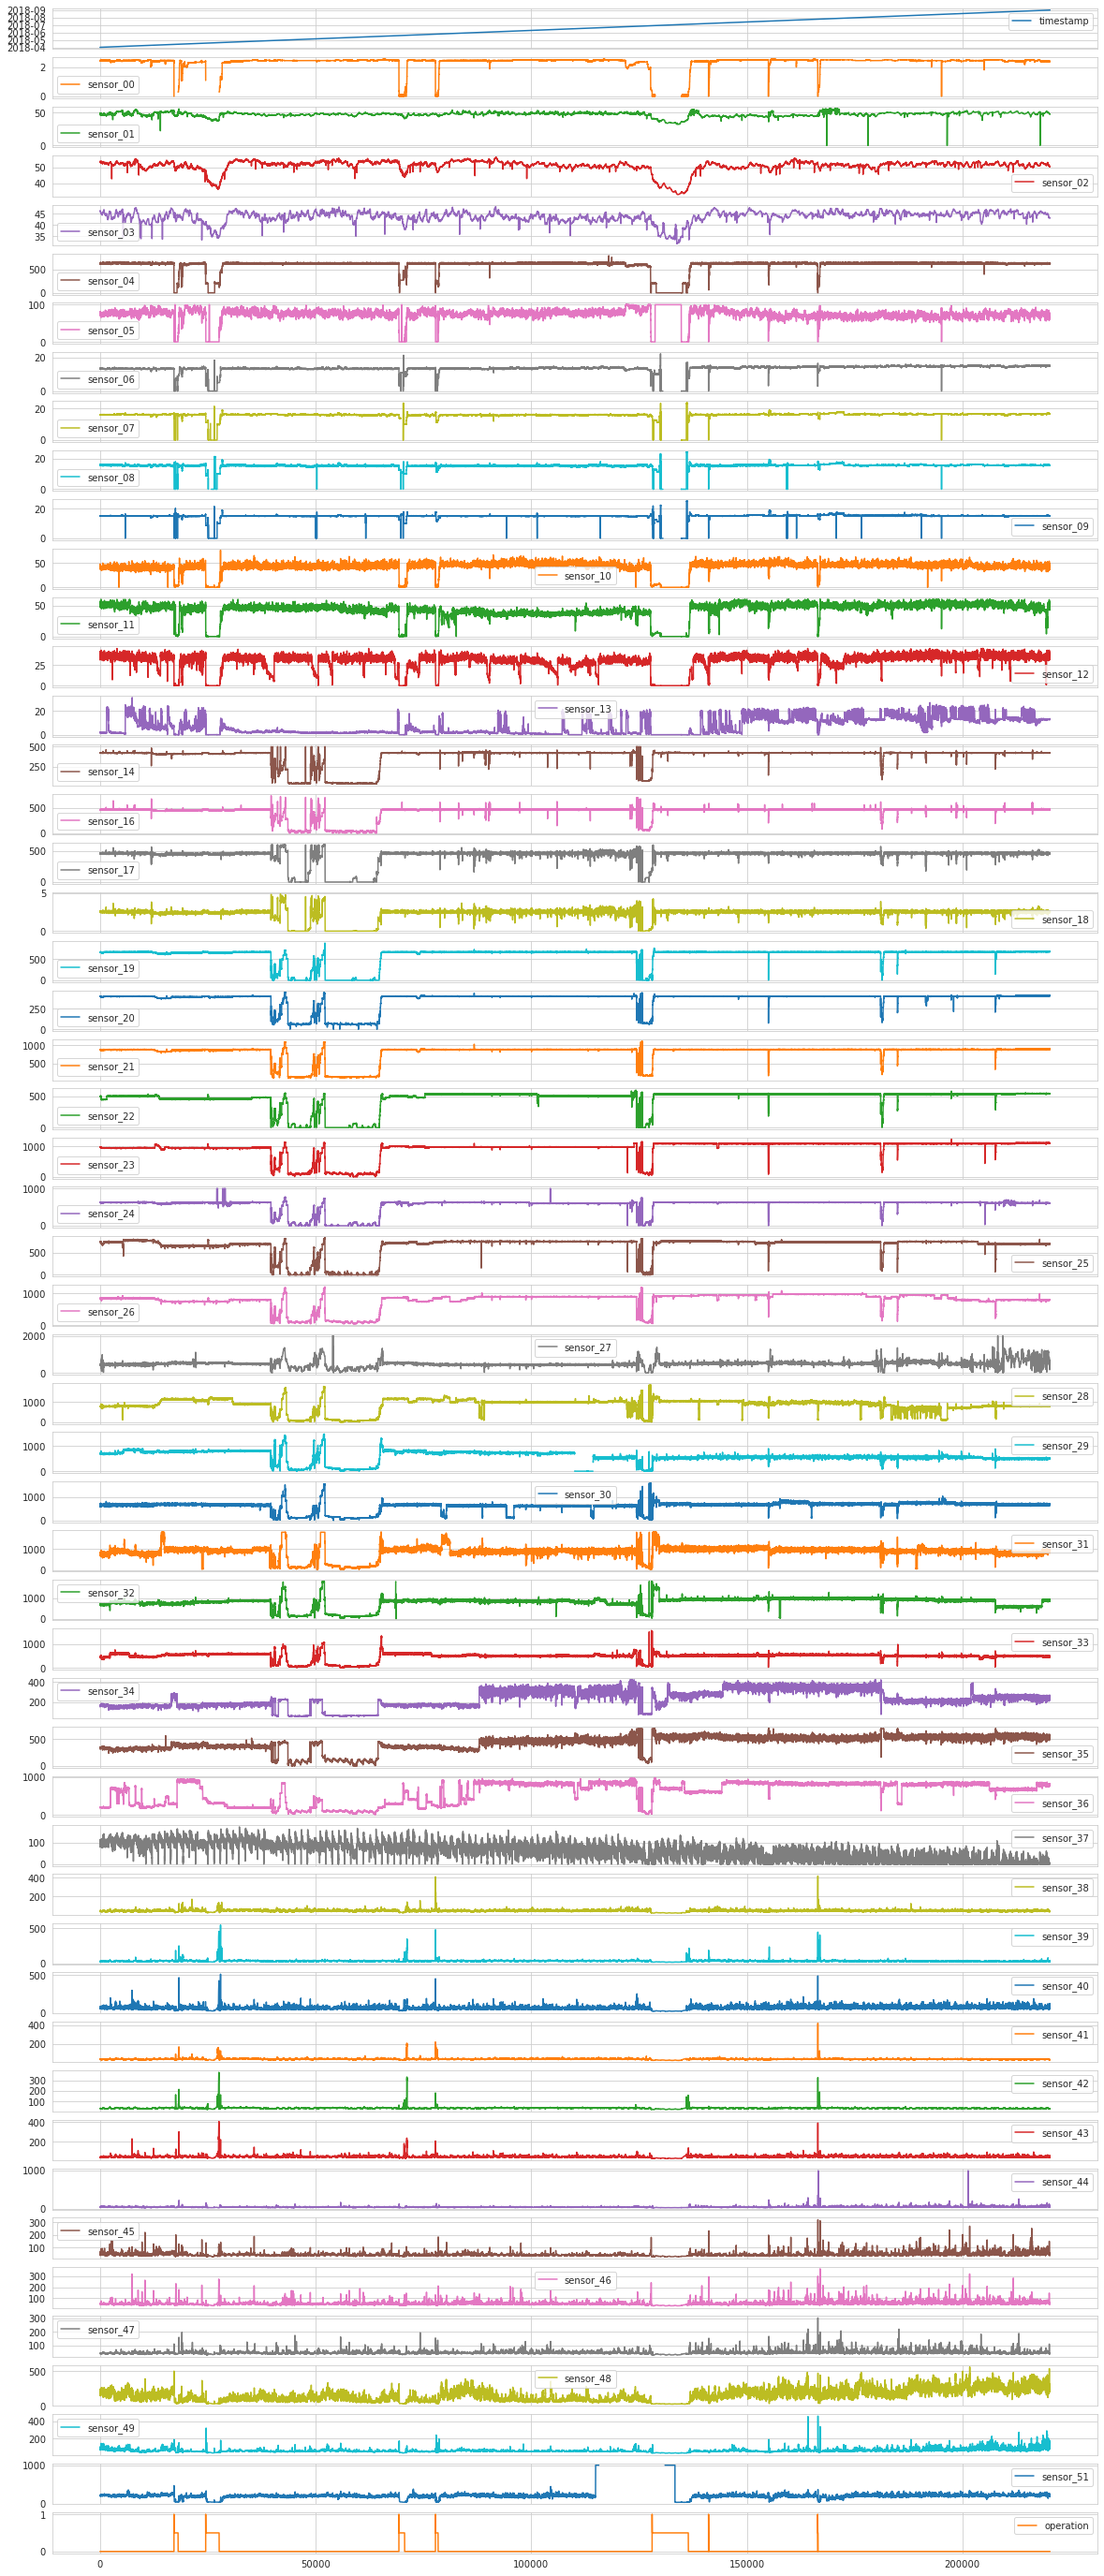

In [10]:
status = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [0, 1, 0.5]
df['operation'] = np.select(status, label_encoding, default=0)
df.plot(subplots=True, sharex=True, figsize=(20, 50))

### graph pattern clustering
* pattern 0 : 0
* pattern 1 : 1, 2, 3
* pattern 2 : 4 ~ 9
* pattern 3 : 10 ~ 12
* pattern 4 : 13
* pattern 5 : 14, 16, 17, 18
* pattern 6 : 19 ~ 26
* pattern 7 : 27
* pattern 8 : 28, 29, 30, 31, 32, 33
* pattern 9 : 34, 35
* pattern 10 : 36
* pattern 11 : 37
* pattern 12 : 44
* pattern 13 : 38 ~ 43, 45 ~ 47
* pattern 14 : 48
* pattern 15 : 49
* pattern 16 : 51

### Problem Definitions : please refer to README.md

In [11]:
df.head(3)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status,operation
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL,0.0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL,0.0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.39757,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL,0.0


In [12]:
# Variable 
time = ['timestamp']

num_variables = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']

target = ['operation']

In [13]:
df = df[time + num_variables + target].copy()
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51', 'operation'],
      dtype='object')

<AxesSubplot:>

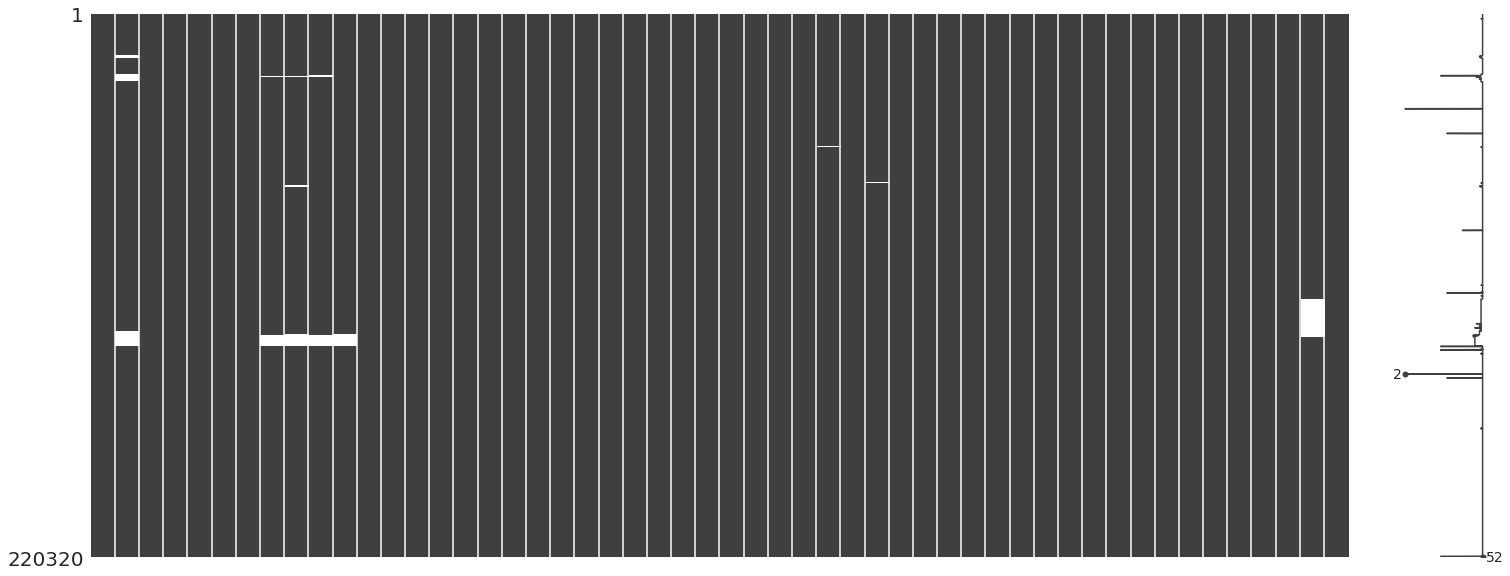

In [14]:
msno.matrix(df)

In [15]:
df.head(3)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,operation
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,0.0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,0.0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.39757,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,0.0


In [16]:
# df['timestamp'][df['sensor_00'].isnull()]

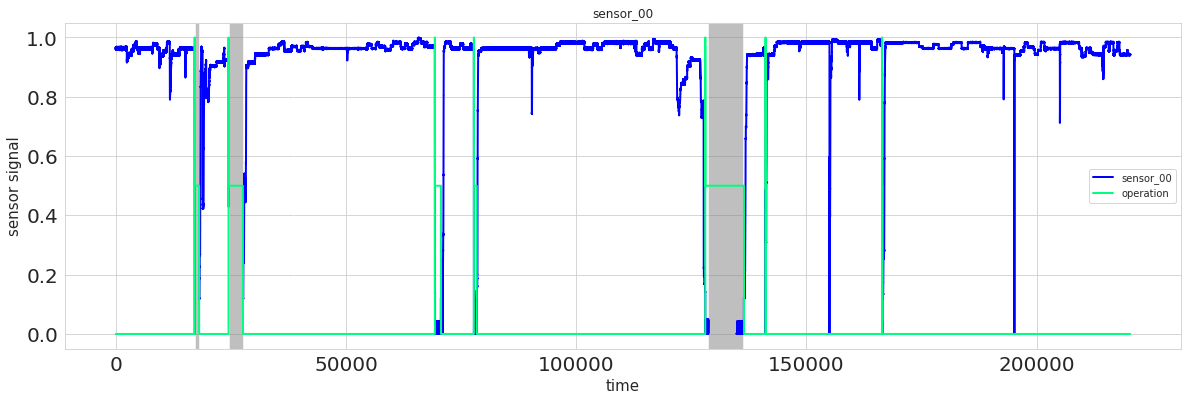

In [17]:
# Determine the correlation of missing values against labeling

scaler = MinMaxScaler()

features = [
    f for f in df.columns if f not in ('timestamp', 'operation')
]

df[features] = scaler.fit_transform(df[features]) 

# find a sophisticated expression

span_start1 = 17160
span_end1 = 18075

span_start2 = 24511
span_end2 = 27613

span_start3 = 38508
span_end3 = 38515

span_start4 = 69928
span_end4 = 70022

span_start5 = 128719
span_end5 = 136265

nan_check_sensor_list = ['sensor_00', 'sensor_01', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_30', 'sensor_51']
nan_check_sensor_df = df[nan_check_sensor_list]

df[[nan_check_sensor_df.columns[0], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.axvspan(span_start2, span_end2, facecolor='gray', alpha=0.5)
plt.axvspan(span_start3, span_end3, facecolor='gray', alpha=0.5)
plt.axvspan(span_start4, span_end4, facecolor='gray', alpha=0.5)
plt.axvspan(span_start5, span_end5, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[0])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

# for i in range(len(df[nan_check_sensor_list].columns)):
#     df[[nan_check_sensor_df.columns[i], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
#     plt.title(nan_check_sensor_list[i])
#     plt.xlabel('time', fontsize=15)
#     plt.ylabel('sensor signal', fontsize=15)
#     plt.show()

In [18]:
# df['timestamp'][df['sensor_01'].isnull()]

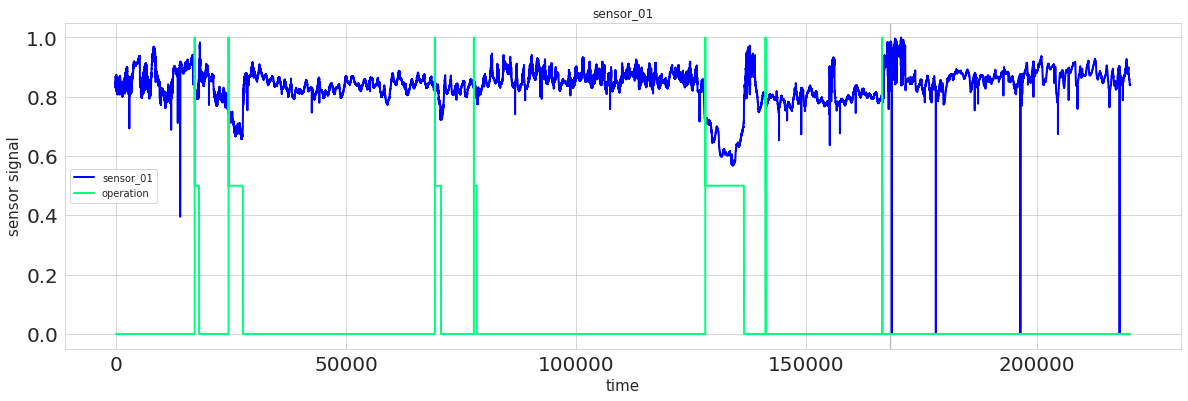

In [19]:
span_start1 = 167989
span_end1 = 168272

df[[nan_check_sensor_df.columns[1], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[1])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [20]:
# df['timestamp'][df['sensor_06'].isnull()]

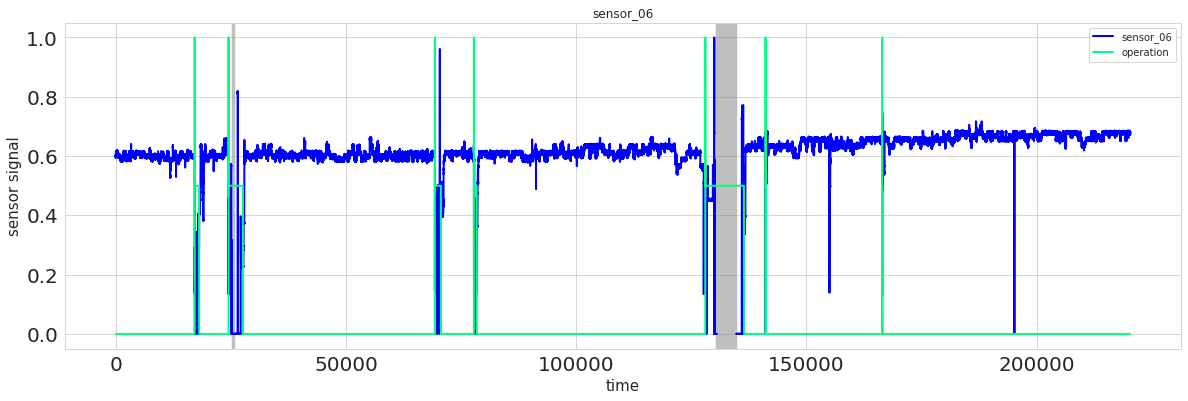

In [21]:
span_start1 = 25112
span_end1 = 25822

span_start2 = 130216
span_end2 = 134855

df[[nan_check_sensor_df.columns[2], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.axvspan(span_start2, span_end2, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[2])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [22]:
# df['timestamp'][df['sensor_07'].isnull()]

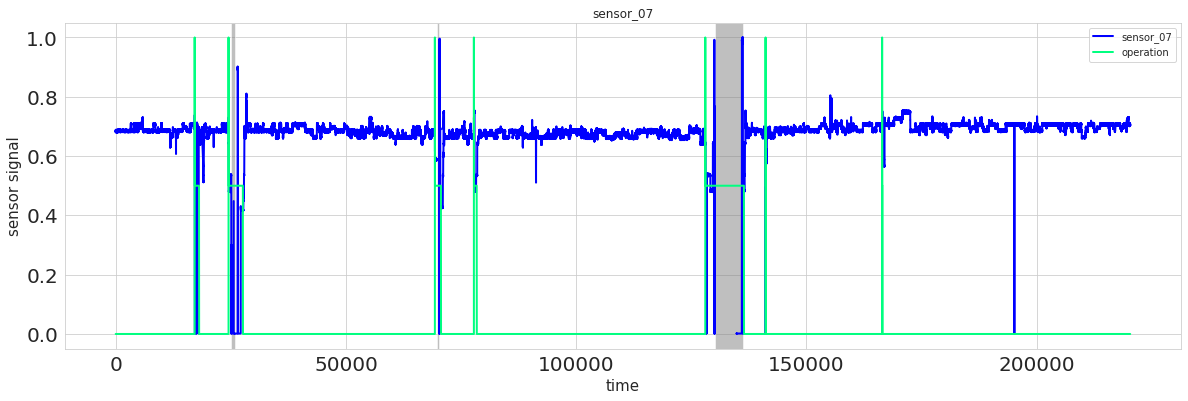

In [23]:
span_start1 = 25112
span_end1 = 25822

span_start2 = 69739
span_end2 = 70319

span_start3 = 130158
span_end3 = 136265

df[[nan_check_sensor_df.columns[3], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.axvspan(span_start2, span_end2, facecolor='gray', alpha=0.5)
plt.axvspan(span_start3, span_end3, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[3])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [24]:
# df['timestamp'][df['sensor_08'].isnull()]

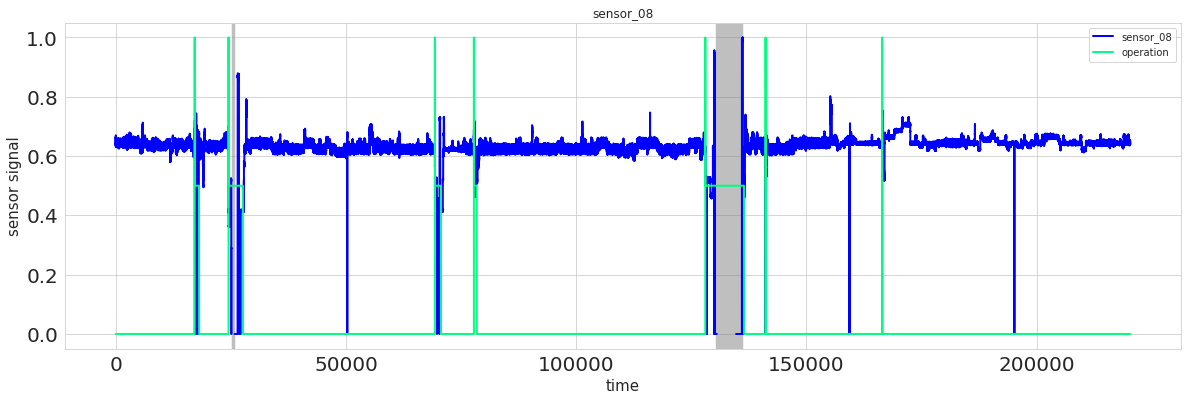

In [25]:
span_start1 = 25112
span_end1 = 25822

span_start2 = 130158
span_end2 = 136265

df[[nan_check_sensor_df.columns[4], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.axvspan(span_start2, span_end2, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[4])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [26]:
# df['timestamp'][df['sensor_09'].isnull()]

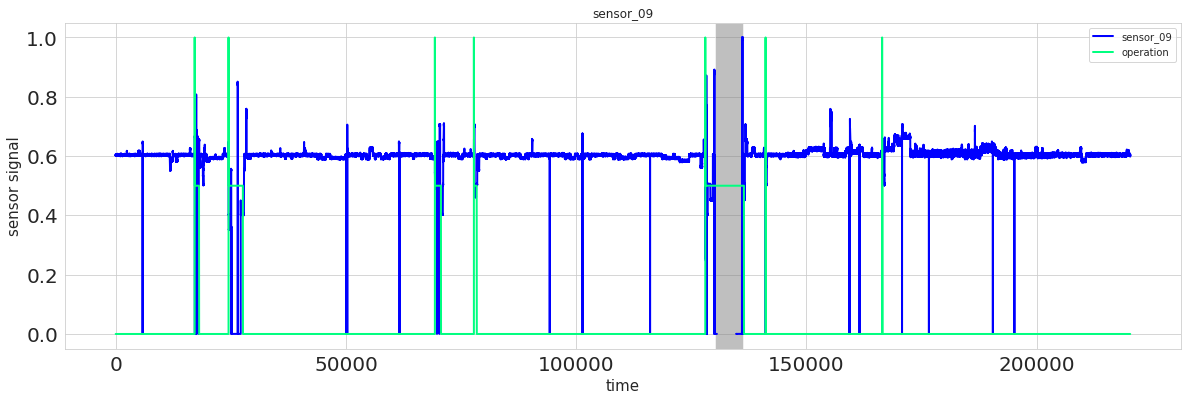

In [27]:
span_start1 = 130158
span_end1 = 136265

df[[nan_check_sensor_df.columns[5], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[5])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [28]:
# df['timestamp'][df['sensor_30'].isnull()]

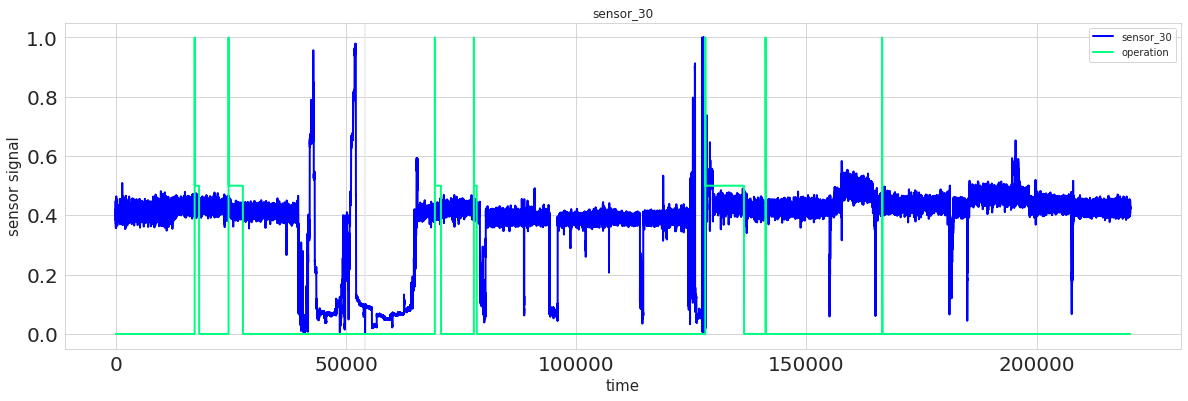

In [29]:
span_start1 = 53904
span_end1 = 54163

df[[nan_check_sensor_df.columns[6], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[6])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

In [30]:
# df['timestamp'][df['sensor_51'].isnull()]

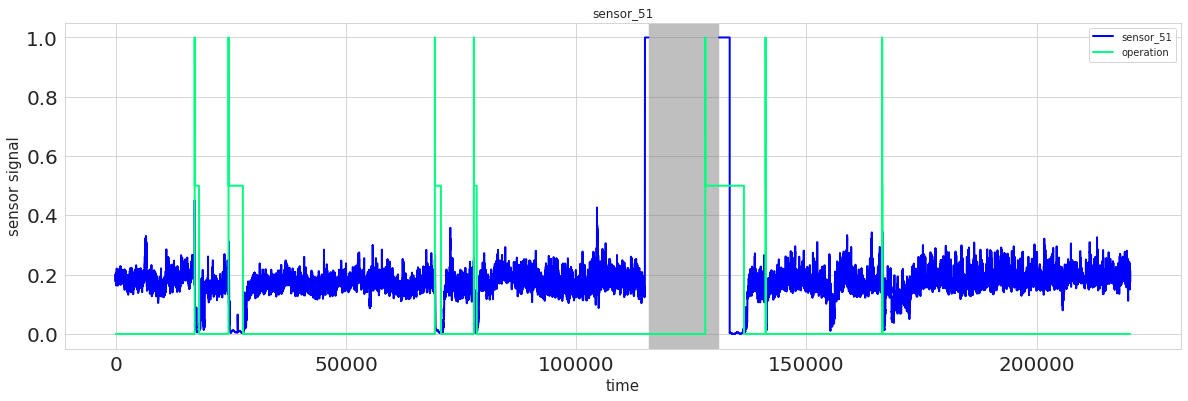

In [31]:
span_start1 = 115678
span_end1 = 131033

df[[nan_check_sensor_df.columns[7], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='winter')
plt.axvspan(span_start1, span_end1, facecolor='gray', alpha=0.5)
plt.title(nan_check_sensor_list[7])
plt.xlabel('time', fontsize=15)
plt.ylabel('sensor signal', fontsize=15)

plt.show()

* sensor_00 : recovering  
* **sensor_01 : normal**  
* sensor_06 : recovering  
* sensor_07 : recovering  
* sensor_08 : recovering   
* sensor_09 : recovering   
* **sensor_30 : normal**  
* **sensro_51 : normal + broken + recovering** 

In the case of recovering or normal, there are no change in the stage of the label, so it needs to be filled with a similar value.  
However, in the case of "sensor_51", the normal / broken / recovering steps are all observed in the range of missing values, it's better to delete it altogether.

In [32]:
# redefine nan_df
nan_df = nan_df + df[['sensor_51']]

# preprocessing : remove sensor_51 data \n",
df.drop(['sensor_51'], axis=1, inplace=True) 

nan_check_sensor_list = ['sensor_00', 'sensor_01', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_30']
nan_check_sensor_df = df[nan_check_sensor_list]

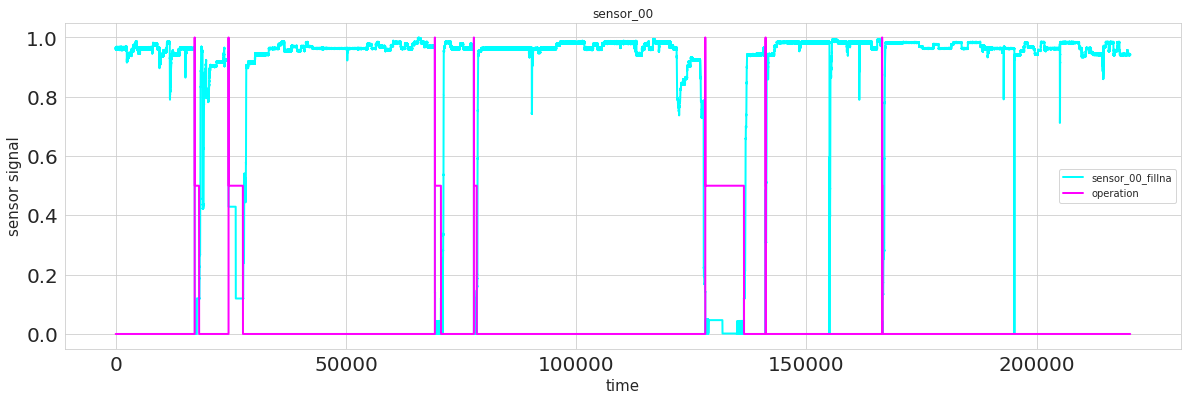

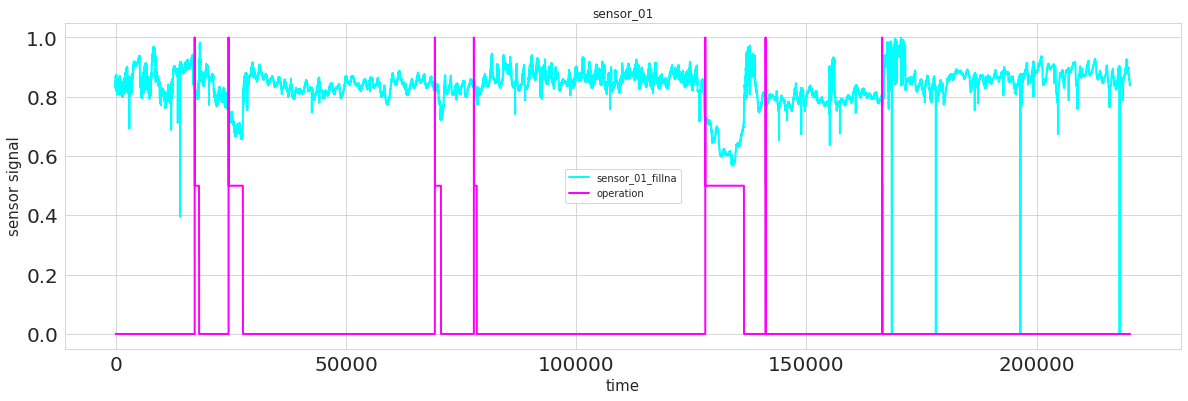

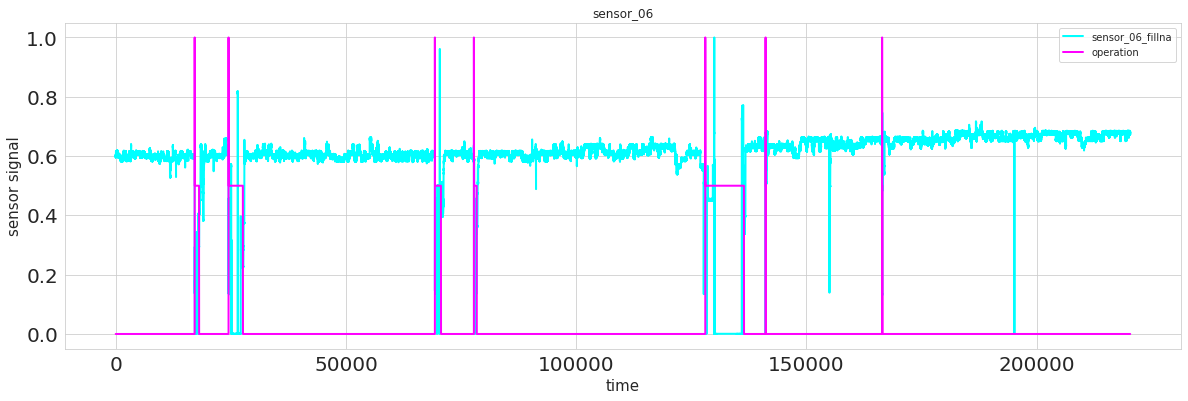

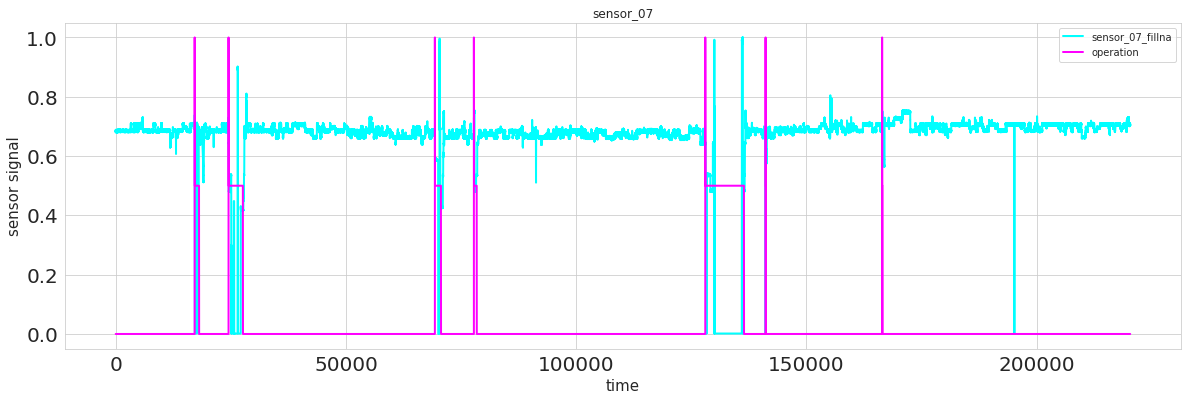

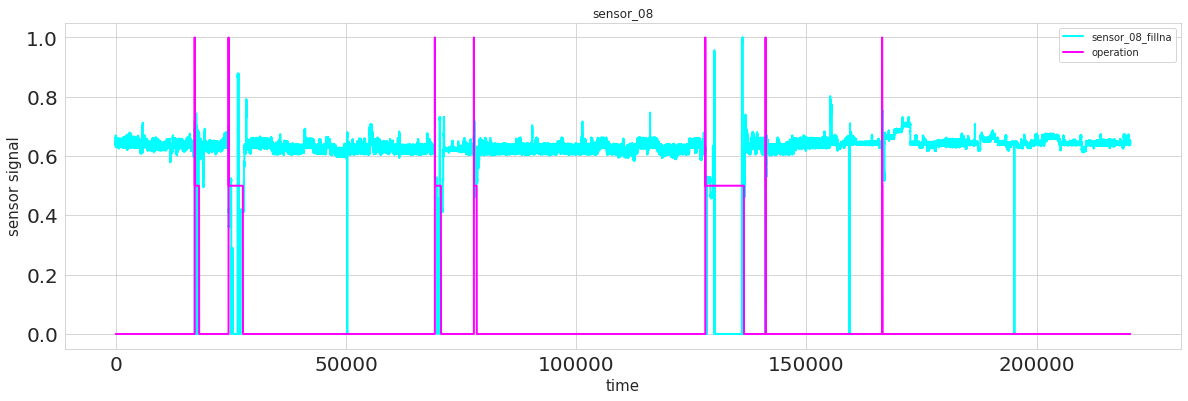

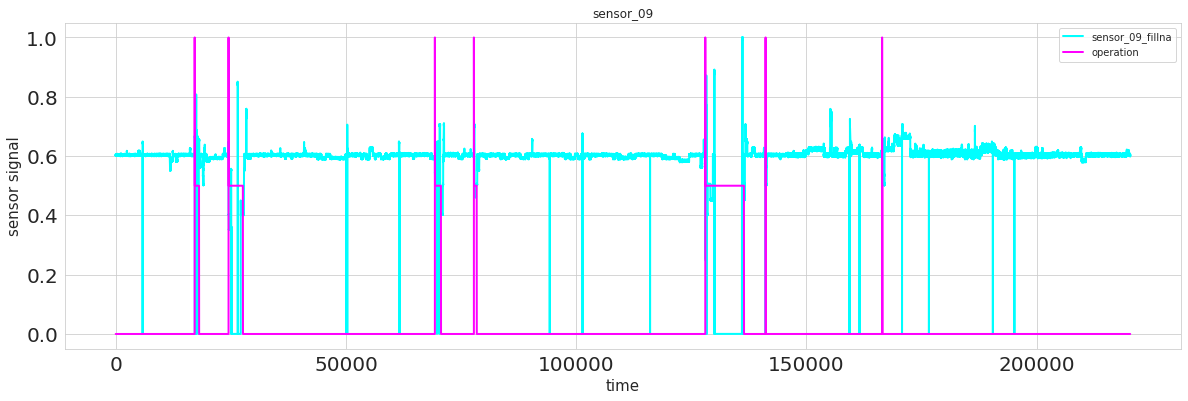

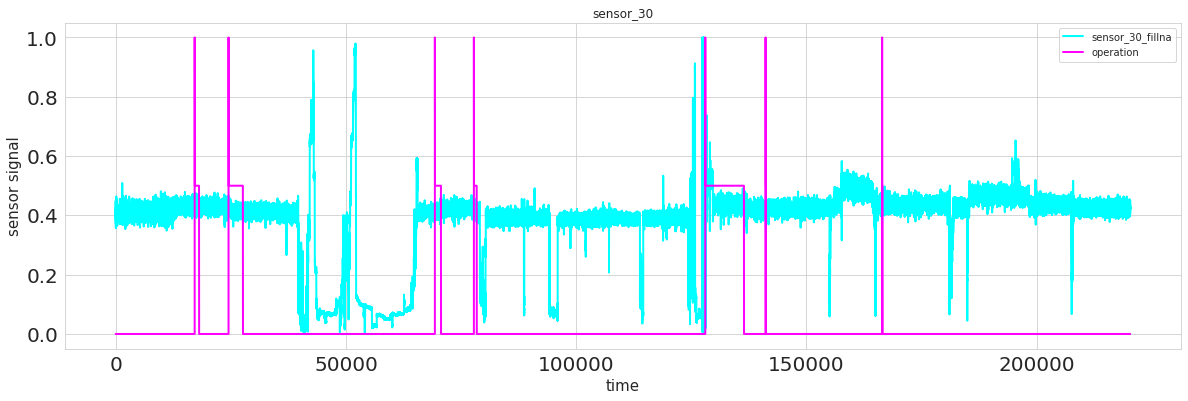

In [33]:
# first : check sensor 00, 01, 06, 07, 08, 09, 30

for i in range(len(df[nan_check_sensor_list].columns)):
    interpol = pd.Series(df[nan_check_sensor_list[i]]).interpolate(method='nearest')
    df[(nan_check_sensor_list[i] + "_fillna")] = pd.DataFrame(interpol)

for j in range(len(df[nan_check_sensor_list].columns)):
    df[[df.columns[j-len(nan_check_sensor_list)], 'operation']].plot(kind='line', figsize=(20,6), linewidth=2, fontsize=20, colormap='cool')
    plt.title(nan_check_sensor_list[j])
    plt.xlabel('time', fontsize=15)
    plt.ylabel('sensor signal', fontsize=15)
    plt.show()

# for j in range(len(df[nan_check_sensor_list].columns)):
#     ax = sns.lineplot(data=df[[nan_check_sensor_list[j], df.columns[j-len(nan_check_sensor_list)]]])
#     plt.title(nan_check_sensor_list[j])
#     plt.xlabel('time', fontsize=15)
#     plt.ylabel('sensor signal', fontsize=15)
#     plt.show()

# df[['sensor_00', 'sensor_000']].plot(kind='line', figsize=(10,6), linewidth=1, fontsize=20, colormap='cool')

In [34]:
df.head(1)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_48,sensor_49,operation,sensor_00_fillna,sensor_01_fillna,sensor_06_fillna,sensor_07_fillna,sensor_08_fillna,sensor_09_fillna,sensor_30_fillna
0,2018-04-01,0.967194,0.830145,0.87666,0.884816,0.792242,0.764598,0.602472,0.68363,0.638905,...,0.245946,0.093853,0.0,0.967194,0.830145,0.602472,0.68363,0.638905,0.602141,0.371528


In [35]:
for i in range(len(df[nan_check_sensor_list].columns)):
    df[[nan_check_sensor_list[i]]] = df[[df.columns[i-len(nan_check_sensor_list)]]]
    df.drop([(nan_check_sensor_list[i] + "_fillna")], axis=1, inplace=True)

In [36]:
num_variables.remove('sensor_51')

In [37]:
df = df.fillna(method='ffill')

<AxesSubplot:>

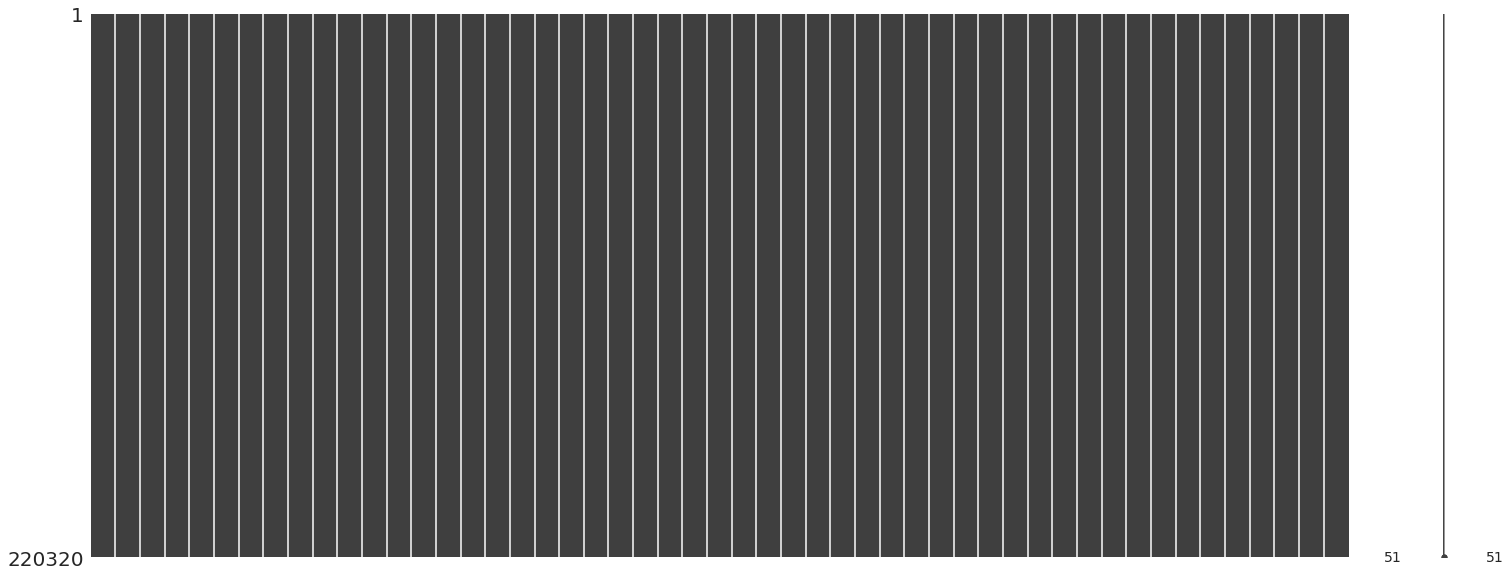

In [38]:
msno.matrix(df)

### final check 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

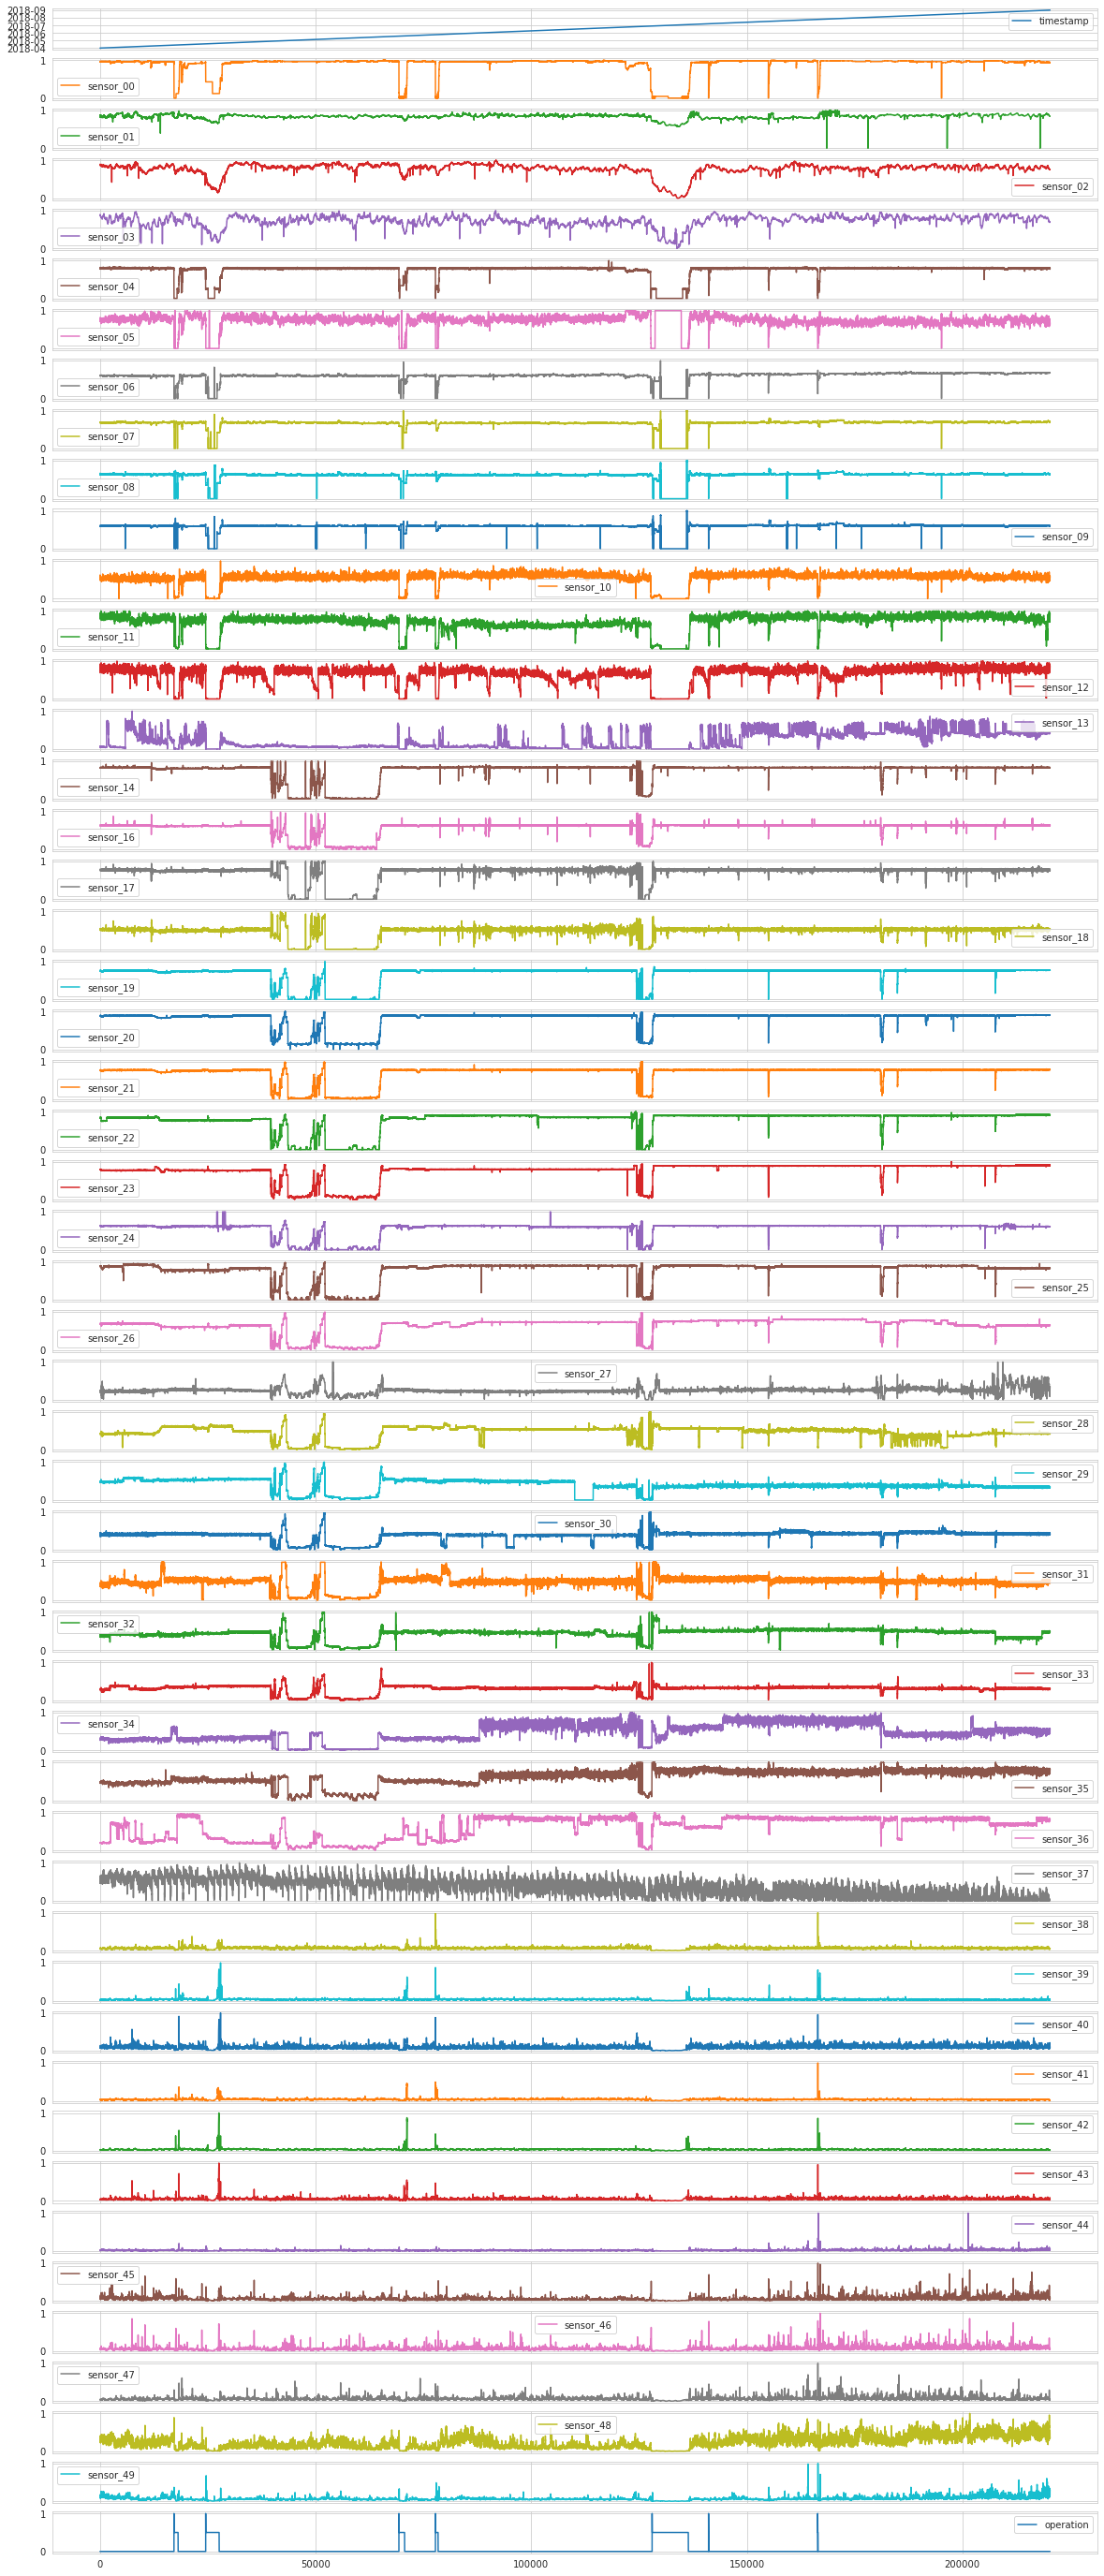

In [39]:
df.plot(subplots=True, sharex=True, figsize=(20, 50))

### Save

In [40]:
df.to_csv('/home/kym/ML/input/ai_nova/pre_sensor.csv')